# <u>Objective: Predict if a customer will default on a credit card payment or not</u>
### Draft 1
## <u> Introduction</u>
Credit cards are one of the main sources of revenue for major banks today. As the number of customers using credit cards steadily grows, defaults on credit card payments are also growing. Additionally, as it becomes easier to get a credit card even with a limited credit history, the risk of a large number of customers defaulting on a credit card payment only grows.

#### Additional topics for research
- Facts and figures on credit card data for banks
- credit card default information if available - impact of customer defaults on credit cards.

## <u>Objective</u>
This study was undertaken by me on behalf of the bank. The objective, for the bank, is to be able to identify clients who can potentially default on their credit card payment. The bank has a large amount of customer data but for reasons related to privacy concerns, only a limited list of features is available to us to perform the analysis. 

Our objective is to build a model, based on the data provided by the bank, which predicts with maximum accuracy, which customers will default on their payment. 

## <u>Data Set Information</u>
- As obtained from the data source: [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients]

> This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:-

>X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

>X2: Gender (1 = male; 2 = female). 

>X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

>X4: Marital status (1 = married; 2 = single; 3 = others). 

>X5: Age (year). 

>X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;
X7 = the repayment status in August, 2005;
. . .;X11 = the repayment status in April, 2005.

>The measurement scale for the repayment status is: -1 = pay duly;
1 = payment delay for one month; 
2 = payment delay for two months;
. . .; 8 = payment delay for eight months;
9 = payment delay for nine months and above. 

>X12-X17: Amount of bill statement (NT dollar).
X12 = amount of bill statement in September, 2005;
X13 = amount of bill statement in August, 2005;
. . .; X17 = amount of bill statement in April, 2005.


>X18-X23: Amount of previous payment (NT dollar).
X18 = amount paid in September, 2005;
X19 = amount paid in August, 2005;
. . .;X23 = amount paid in April, 2005.

*It is important to note that the data is almost 15 years old. 15 years ago, banks had a much limited amount of information about customers and their spending habits as compared to today and perhaps models created today with the additional information will be able to predict better*

## <u>Methodology</u>

### Data Import and Cleaning

### Exploratory Data Analysis using Data Vizualizations

### Feature Selection and Feature Engineering

### Models 

   #### *Logistic Regression*
   #### *K-Nearest Neighbours*
   #### *Decision Tree Classification*
   #### *Random Forest*
   
### Model Evaluation

### Assumptions and Limitations

## <u>Conclusion and Client Recommendation</u>

## <u>Future Research</u>

### Data Import and Cleaning
In this section, we will be looking at importing the data and checking it for missing or erronous data. 

In [1]:
# Importing all packages I am going to use for this data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#importing file - saved file as csv file and then read it
## ? - can we read xls file in pandas? Yes. read_XLS
df = pd.read_csv('C:/Users/ASUS/CapStone1_ExploratoryTests_CCardData/Data Sets/ccclients_v2.csv')
#attribute to get column names
print(df.columns)
print('=====================================')
#shape of the data
print('Data Shape:',df.shape)
print('=====================================')

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
Data Shape: (30000, 25)


This dataset has 25 columns and 30000 rows

In [2]:
#practice basics
#basic info about the dataset - 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

The info shows that there are no blank/missing values
sex should probably be a category - M/F
Categorized data: sex, education, marriage, age-group - need to add column to the data
COnverting sex, education and marriage to categories may save space

In [3]:
# practice basics
#describing the data to identify possible outliers
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

Comments on above:-
1. Education field has a max value of 6 which may be an error
2. Marriage field has a max value of 3 which may be an error

2    18112
1    11888
Name: SEX, dtype: int64
-------------------------------------


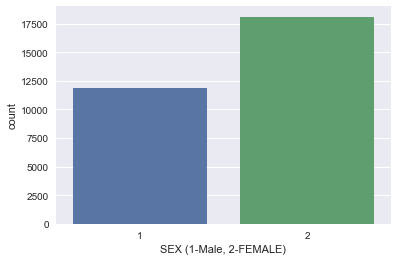

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
-------------------------------------


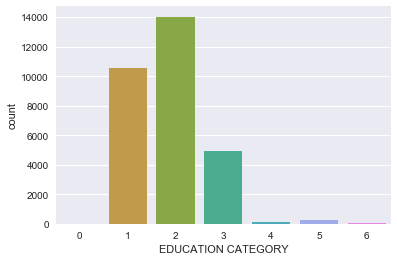

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
-------------------------------------


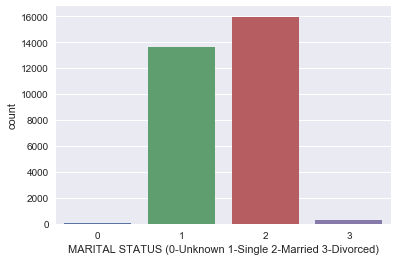

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64
-------------------------------------


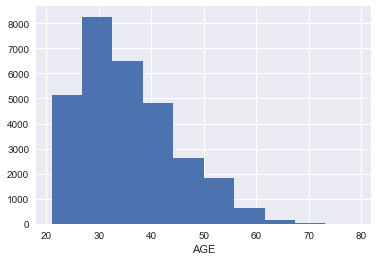

More statistics for AGE
MEAN AGE:  35.4855
MEDIAN AGE:  34.0


In [4]:
#Practice basics
#value_counts() - trying to identify outliers + plotting bar charts for each of the dimensions to observe distribution
#Ploting bar charts because these are all categorical values
print('=====================================')
print(df['SEX'].value_counts(dropna=False))
print('-------------------------------------')
_=sns.countplot(x='SEX',data=df) #seaborn's countplot to plot bar charts showing counts
plt.xlabel('SEX (1-Male, 2-FEMALE)')
plt.show()
print('=====================================')
print(df['EDUCATION'].value_counts(dropna=False))
print('-------------------------------------')
_=sns.countplot(x='EDUCATION',data=df)
plt.xlabel('EDUCATION CATEGORY')
plt.show()
print('=====================================')
print(df['MARRIAGE'].value_counts(dropna=False))
print('-------------------------------------')
_=sns.countplot(x='MARRIAGE',data=df)
_=plt.xlabel('MARITAL STATUS (0-Unknown 1-Single 2-Married 3-Divorced)')
plt.show()
print('=====================================')
print(df['AGE'].value_counts(dropna=False))
print('-------------------------------------')
_=plt.hist(df['AGE']) #histogram because AGe is not a category
plt.xlabel('AGE')
plt.show()
print('=====================================')
print('More statistics for AGE')
print("MEAN AGE: ",np.mean(df['AGE']))
print("MEDIAN AGE: ",np.median(df['AGE']))

From the above value_counts() check, we can conclude the following:-
1. Education category has 6 values (0 to 6) Below is the explaination for the EDUCATION field in the data set information.
   X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
   5 and 6 are not accounted for but rows of the data do not seem to be errors.
   
2. Marriage category has 4 values (0 to 3) Below is the explaination for the MARRIAGE field in the data set information.
   X4: Marital status (1 = married; 2 = single; 3 = others)
   0 is unaccounted for. There are 54 values under 0 so it desnt seem to be an error.

3. Ages are between 29 and 79 so possibly no erronous values

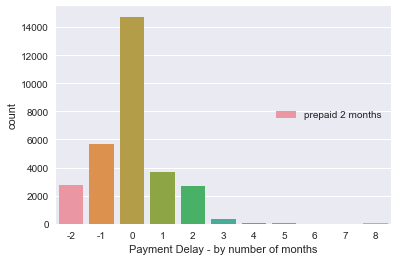

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


In [5]:
#histogram for the PAY_0 field - payment for the most recent month 
_=sns.countplot(x='PAY_0',data=df) #seaborn's countplot to plot bar charts showing counts
payment_legend = ['prepaid 2 months', 'prepaid 1 month', 'on time', '1 month delay', '2 month delay', '3 month delay', '4 month delay', '5 month delay', '6 month delay', '7 month delay', '8 month delay']
plt.xlabel('Payment Delay - by number of months')
plt.legend(payment_legend, ncol=3, loc='right')
plt.show()
print(df['PAY_0'].value_counts(dropna=False))

Most people pay on time and a chuck of them are late, but most people who are late are late by 1 or 2 months
Additional histogram charts:-
1. Sum of people who are late
2. Sum of people who pay on time
3. Sum of people who are late by more than two months

Charts for each month

Renaming columns
1. PAY_0 to PAY_1

In [6]:
#rename column
df.rename(columns={'PAY_0':'PAY_1'})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


Here is the description which the data set information gives for the columns.
"X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above."

PAY_0(X6): Payment for the month of September. 
Followig is the list of values:-
-2: ? (Paid before due date?)
-1: ? (Paid before due date?)
0: Paid on Due Date
1: One month delay
2: Two month delay
3: Three month delay
4: Four month delay
5: Five month delay

6: Six month delay
7: Seven month delay
8: Eight month delay

Some basics have been covered. The next steps are:-
1. Cleaning the data
2. Exploratory Analysis
3. Exporting the data
4. Statistical Analysis (different notebook)
5. Application of Machine learning (different notebook)

Now that we are done playing around with the data, lets work on cleaning it. 
1. Convert SEX, EDUCATION and MARRIAGE columns to categories
    - check for data saved after converting to category
2. Identify and conclude what -2 means in the PAY_ columns: rename it as -1 if it means payment done before time
    - see what values are there in the pay column and bill column corresponding -2 value    


In [7]:
#Converting SEX, EDUCATION and MARRIAGE COlumns to categories
df['SEX']=df['SEX'].astype('category')
df['EDUCATION']=df['EDUCATION'].astype('category')
df['MARRIAGE']=df['MARRIAGE'].astype('category')
# Check for impact on datasize
df.info()
df['SEX'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6      

CategoricalDtype(categories=[1, 2], ordered=False)

- The three fields have been reclassified as categories
- Also, there was a data savings of .6 MB out of 5.7 MB which is almost 10% - will be significant if data size is huge

- Assuming that in the 'SEX' column, 1 means 'Male' and 2 means 'Female' we can reclassify the columns

In [8]:
#renaming categorical fields to better understand content
#df['SEX'].cat.categories = df['SEX'].cat.rename_categories(['Male','Female'])
df['SEX']=df['SEX'].cat.rename_categories({1: 'M', 2: 'F'})

In [9]:
#renaming the categories for education and marriage
df['MARRIAGE']=df['MARRIAGE'].cat.rename_categories({0: 'NA', 1: 'Married', 2:'Single', 3:'Divorced'})

In [10]:
#Renaming categories for EDUCATION
#pending
df['EDUCTION']=df['EDUCATION'].cat.rename_categories({0: 'NA', 1: 'High School', 2:'Bachelors', 3:'Masters', 4:'Doctoral', 5:'Diploma', 6:'No Degree'})

In [11]:
#Renaming columns - last column 'default payment next month' to 'default' and dropping the old column
df['default']=df['default payment next month'].astype('category')
df= df.drop(columns=['default payment next month'])

Basic Exploratory Visualizations:-
1. Distribution of default status

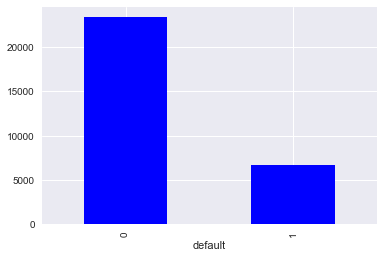

22.12% of customers defaulted


In [12]:
defaultDistribution = df.groupby(['default']).size()
defaultDistribution.plot(kind ='bar',color = 'blue')
plt.show()
print("{}% of customers defaulted".format(defaultDistribution[1]/(defaultDistribution[1]+defaultDistribution[0])*100))

Analysis of defaults by:-
1. SEX
2. MARITAL STATUS
3. EDUCATION

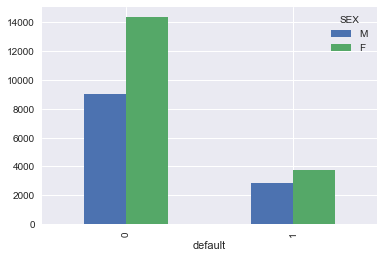

In [13]:
#SEX
defaultByGender = df.groupby(['default','SEX']).size()
defaultByGender.unstack(level=1).plot(kind='bar', stacked=False)


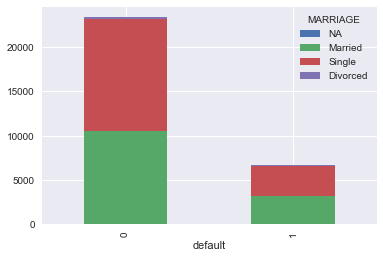

In [14]:
#Marital Status
defaultByMaritalStatus = df.groupby(['default','MARRIAGE']).size()
defaultByMaritalStatus.unstack(level=1).plot(kind='bar', stacked=True)

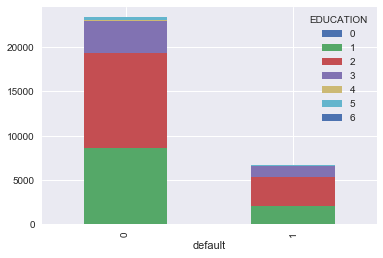

In [15]:
#Education
defaultByEducation = df.groupby(['default','EDUCATION']).size()
defaultByEducation.unstack(level=1).plot(kind='bar', stacked=True)

#error code - trying to make a stacked bar chart
#defaultByEducation = df.pivot_table(values=['default'], index='ID', columns='EDUCATION', aggfunc='count')
#defaultByEducation = defaultByEducation.div(defaultByEducation.sum(1), axis=0)
#defaultByEducation.plot(kind='bar', stacked=True)

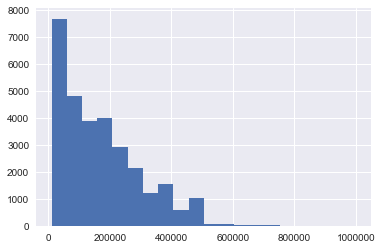

In [16]:
#Histogram with more bins
_=plt.hist(df['LIMIT_BAL'], bins=20)
plt.show()

Histograms can suffer from Binning Bias. Emperical Cumilative Distribution Function can help get a better picture of the data. Attempting some ECDFs for single dimension measures. Creating a function to calculate ECDFs.

In [17]:
#fun ecdf
def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

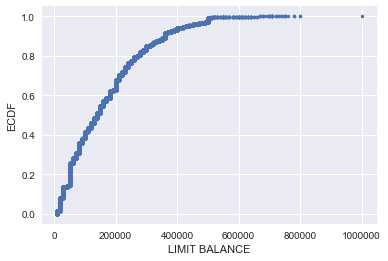

In [18]:
#ECDF on Balance limits
x_limitBal, y_limitBal = ecdf(df['LIMIT_BAL'])
_=plt.plot(x_limitBal,y_limitBal,marker='.', linestyle='none')
plt.margins(0.05)
_=plt.xlabel('LIMIT BALANCE')
_=plt.ylabel('ECDF')
plt.show()

95% of the customers have balance limit below or equal to 400,000. 1 person has balance limit of $1Mil. 

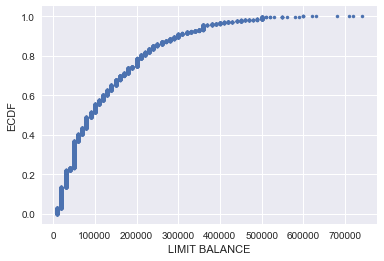

In [19]:
#ECDF on Balance Limits of only defaulters
df_default=df.loc[df['default']==1]
x_limitBal_d, y_limitBal_d = ecdf(df_default['LIMIT_BAL'])
_=plt.plot(x_limitBal_d,y_limitBal_d,marker='.', linestyle='none')
plt.margins(0.05)
_=plt.xlabel('LIMIT BALANCE')
_=plt.ylabel('ECDF')
plt.show()

95% of the defaulters have a balance limit of below 400,000.

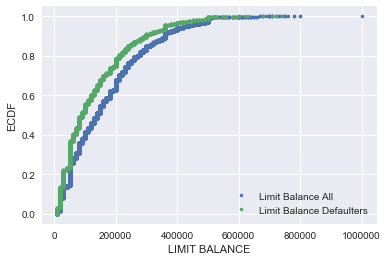

In [20]:
#Plotting both together
x_limitBal, y_limitBal = ecdf(df['LIMIT_BAL'])
x_limitBal_d, y_limitBal_d = ecdf(df_default['LIMIT_BAL'])
_=plt.plot(x_limitBal,y_limitBal,marker='.', linestyle='none')
_=plt.plot(x_limitBal_d,y_limitBal_d,marker='.', linestyle='none')
plt.margins(0.05)
plt.legend(('Limit Balance All', 'Limit Balance Defaulters'), loc='lower right')
_=plt.xlabel('LIMIT BALANCE')
_=plt.ylabel('ECDF')
plt.show()

Most individuals have low limit balances
How can I plot histogram of people who have defaulted? On top of the above histogram? (in a different color)

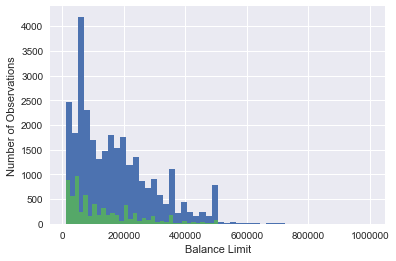

In [21]:
#Trying to plot histogram on top of each other
#Extracting all rows which have default = 1

df_default=df.loc[df['default']==1]
_=plt.hist(df['LIMIT_BAL'], bins=50, label='ALL')
_=plt.hist(df_default['LIMIT_BAL'], bins=50, label='DEFAULTERS')
_=plt.xlabel('Balance Limit')
_=plt.ylabel('Number of Observations')
plt.show()

Overlapping histograms show that people with the lowest balance limits tend to be defaulters. From guessing the numbers we can see that around 900 out of the 2500 people with the lowest balance limit defaulted. This, if verified by further investigation, suggests that the bank gives credit cards/loans to people who are likely to default. 

Visualizing data through box plots. What kind of data should be visualized through boxplots?


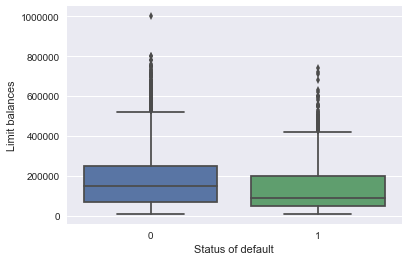

In [22]:
#boxplot
sns.boxplot(x='default', y='LIMIT_BAL', data=df)
_=plt.xlabel('Status of default')
_=plt.ylabel('Limit balances')
plt.show()

Box plots suggest that the for those who default, balance limits beyond 400,000 are clearly outliers. The 75th percentile lies on 200,000. 

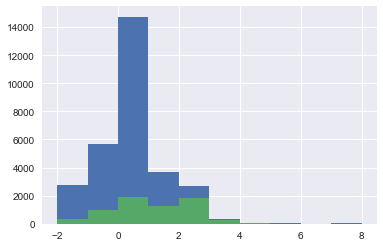

In [23]:
#Random Hiostograms
_=plt.hist(df['PAY_0'])
_=plt.hist(df_default['PAY_0'])
plt.show()

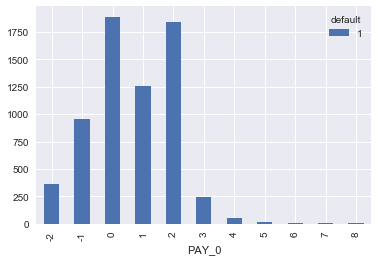

In [24]:
defaultByPAY_o = df_default.groupby(['PAY_0','default']).size()
defaultByPAY_o.unstack(level=1).plot(kind='bar', stacked=True)

Most people who have defulted pay on time or before time. People who are late in payments are late mostly by 1 or 2 months. A small number are late by 3 months.

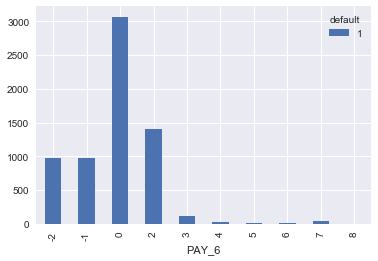

In [25]:
defaultByPAY_6 = df_default.groupby(['PAY_6', 'default']).size()
defaultByPAY_6.unstack(level=1).plot(kind='bar', stacked=False)

Below are some more exploration and manipulation of the data. 

New COlumn to identify absolute Payment delay. If a customer never delays, then the value is 1. If the customer delays even once, then the value is 0.

In [26]:
#df['absPaymentDelaySum'] = df['PAY_0']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
#df['color'] = ['red' if x == 'Z' else 'green' for x in df['Set']]
#df['absPaymentDelay'] = np.where(0 )
#df['absPaymentDelay'] = np.where(df['absPaymentDelaySum']>0, 0, 1)
#print(df['absPaymentDelay'])      

In [27]:
#defaultByAbsDefault = df.groupby(['default','absPaymentDelay']).size()
#defaultByAbsDefault.unstack(level=1).plot(kind='bar', stacked=True)

Average Payment AMount

In [28]:
df['AvgPaymentAmount'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
print(np.mean(df['AvgPaymentAmount']))

5275.232094444418


In [29]:
AvgPaymentAmount_default = df_default[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
print(np.mean(AvgPaymentAmount_default ))

3328.215616837453


There is a big difference in the avg payment amount of defaulters as compared to overall avg payment

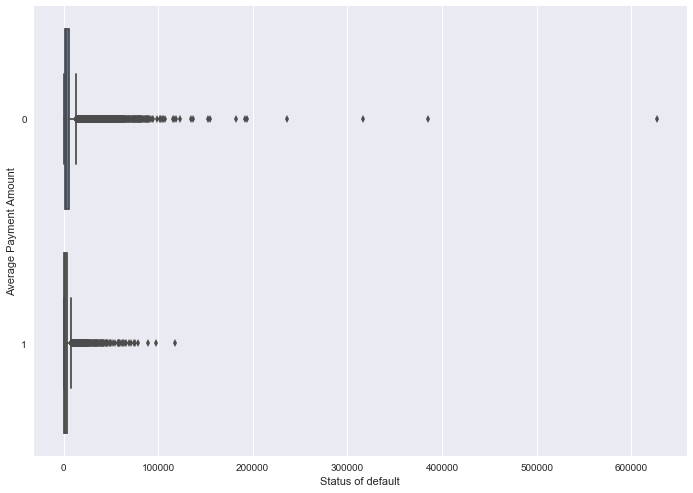

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='AvgPaymentAmount', y='default', data=df)
_=plt.xlabel('Status of default')
_=plt.ylabel('Average Payment Amount')
plt.show()

Average Bill AMount

In [31]:
df['AvgBillAmount'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
print(np.mean(df['AvgBillAmount']))

44976.94519999997


In [32]:
AvgBillAMt_default = df_default[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
print(np.mean(AvgBillAMt_default))

43470.4925909183


Average Bill AMount for defaulters is more or less similar to overall bill amount

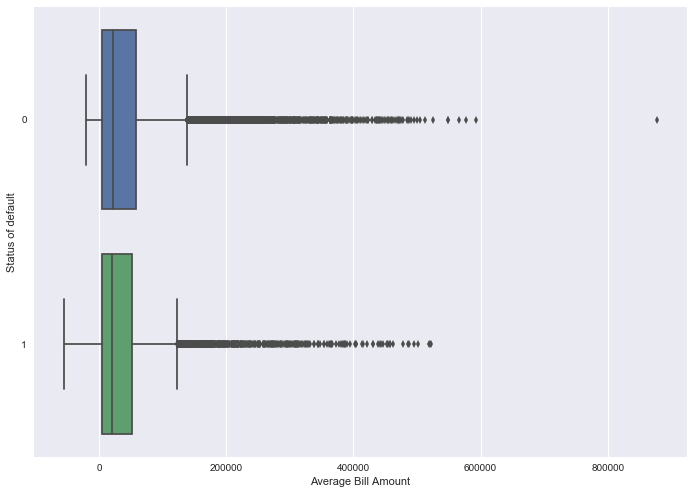

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='AvgBillAmount', y='default', data=df)
_=plt.ylabel('Status of default')
_=plt.xlabel('Average Bill Amount')
plt.show()

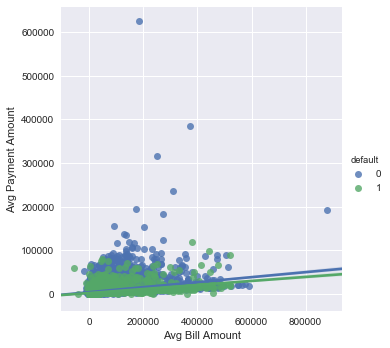

In [34]:
sns.lmplot(x="AvgBillAmount", y="AvgPaymentAmount",hue='default', data=df)
_=plt.xlabel('Avg Bill Amount')
_=plt.ylabel('Avg Payment Amount')
plt.show()

Taking logs of the Average bill and average payment amounts to reduce the skew of the data

In [35]:
from math import log
#zeroes=(df['AvgBillAmount']==0)
#print(zeroes==True)

df['AvgBillAmountLog']  = np.where(df['AvgBillAmount']<=0,0,np.log(df['AvgBillAmount']))

df['AvgPaymentAmountLog']  = np.where(df['AvgPaymentAmount']<=0,0,np.log(df['AvgPaymentAmount']))

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


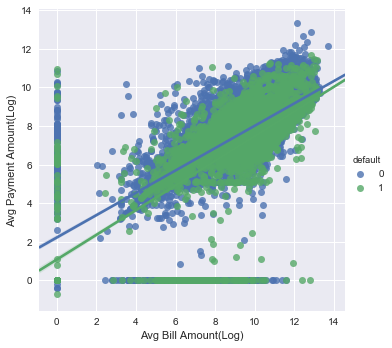

In [36]:
sns.lmplot(x="AvgBillAmountLog", y="AvgPaymentAmountLog",hue='default', data=df)
_=plt.xlabel('Avg Bill Amount(Log)')
_=plt.ylabel('Avg Payment Amount(Log)')
plt.show()

In [37]:
# commented out log section

#df_default['AvgBillAmountLog']  = np.where(df_default['AvgBillAmount']<=0,0,np.log(df_default['AvgBillAmount']))

#df_default['AvgPaymentAmountLog']  = np.where(df_default['AvgPaymentAmount']<=0,0,np.log(df_default['AvgPaymentAmount']))

## Models

The models used here are for classifying data hence I have used models popularly used for these kind of models. The models have been executed twice. The first run is without any modification to the features. The second run includes some feature engineering and modification.

This has been done to identify the impact of feature engineering on such a data set. The other purpose is to also show the impact of feature engineering on methods and whether it makes any difference in such a data set. This understanding will help save time on similar data sets or if similar features are added to the data set. 

The models I have used are:-

- kNN (k Nearest Neighbours)
- Logistic Regression
- SVM (Support Vector Machines)
- Decision Tree Classification
- Random Forests

### Which model is the best? 




###  kNN



The kNN is applied on the dataset without making any parameter changes.


In [38]:
##Splitting the dataframe - separating the fields and the target
df_kNN = pd.read_csv('C:/Users/ASUS/CapStone1_ExploratoryTests_CCardData/Data Sets/ccclients_v2.csv')
df_kNN.head()
df_kNN.drop(['ID'], 1, inplace=True)
df_kNN['default']=df_kNN['default payment next month'].astype('category')
df_kNN.drop(['default payment next month'], 1, inplace=True)

In [39]:
df_kNN.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
X= np.array(df_kNN.drop(['default'],1))
y=np.array(df_kNN['default'])

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import cross_validation

knn_6NN=KNeighborsClassifier (n_neighbors=6)

X_Train,X_Test, y_Train,y_Test = cross_validation.train_test_split(X,y,test_size = 0.3)

knn_6NN.fit (X_Train, y_Train)
accuracy = knn_6NN.score(X_Test, y_Test)

print("The accuracy of kNN with 6 neighbours ", accuracy)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The accuracy of kNN with 6 neighbours  0.768


In [42]:
knn_5NN=KNeighborsClassifier (n_neighbors=5)

knn_5NN.fit (X_Train, y_Train)
accuracy = knn_5NN.score(X_Test, y_Test)

print("The accuracy of kNN with 6 neighbours ", accuracy)

The accuracy of kNN with 6 neighbours  0.7524444444444445


In [43]:
knn_7NN=KNeighborsClassifier (n_neighbors=7)

knn_7NN.fit (X_Train, y_Train)
accuracy = knn_7NN.score(X_Test, y_Test)

print("The accuracy of kNN with 7 neighbours ", accuracy)

The accuracy of kNN with 7 neighbours  0.7574444444444445


### How good is this model ? 

#### Accuracy across different values for k

The kNN is run using number of different values of K. This suggests that training accuracy is better than the testing accuracy for all cases. The highest testing accuracy is around 77 percent for k = 6. The training and testing accuracies get closer as k increases and peaks at around the 77% mark. 


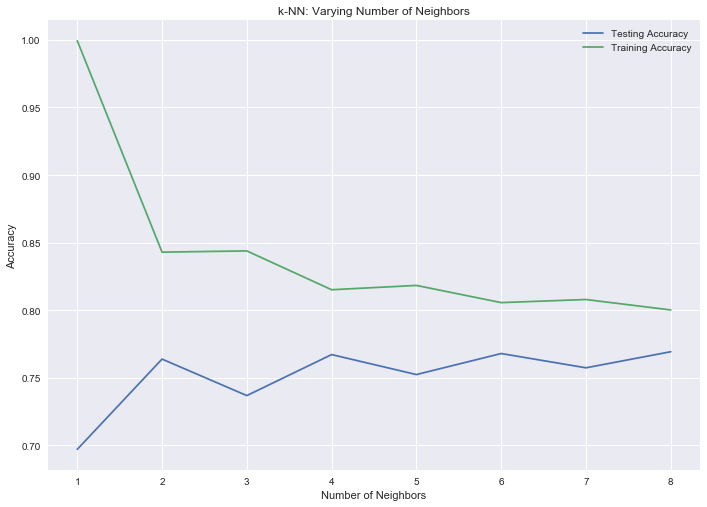

In [44]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_Train,y_Train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_Train, y_Train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_Test, y_Test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Confusion Matrix and Classification report

Accuracy alone is not enough. The confusion matrix helps us identify how many false positives and false negatives (basically incorrectly classified values) were obtained with our model. Here, we will be generating a confusion matrix for kNN with the highest accuracy. (k=6)

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_predicted = knn_6NN.predict(X_Test)

print('Confusion Matrix for kNN with 6 neighbours:')
print(confusion_matrix(y_Test, y_predicted))
print('Classification Report for kNN with 6 neighbours:')
print(classification_report(y_Test, y_predicted))

      

Confusion Matrix for kNN with 6 neighbours:
[[6714  300]
 [1788  198]]
Classification Report for kNN with 6 neighbours:
             precision    recall  f1-score   support

          0       0.79      0.96      0.87      7014
          1       0.40      0.10      0.16      1986

avg / total       0.70      0.77      0.71      9000



Precision is around 70% and Recall is around 77% which means that 70% of non defaulters were classifed correcty and 77% of defaulters were correctly identified

### Logistic Regression



In [46]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_Train, y_Train)
y_logreg_pred = logreg.predict(X_Test)

accuracy_logReg = logreg.score(X_Test, y_Test)


print('Accuracy of Logistic Regression: ',accuracy_logReg )



Accuracy of Logistic Regression:  0.7792222222222223


### How good is this model ? 

#### Confusion Matrix and Classification report for Logistic Regression

Accuracy alone is not enough. The confusion matrix helps us identify how many false positives and false negatives (basically incorrectly classified values) were obtained with our model. Here, we will be generating a confusion matrix for logistic regression.

In [47]:
print('Confusion Matrix for Logistic Regression:')
print(confusion_matrix(y_Test, y_logreg_pred))
print('Classification Report for  Logistic Regression:')
print(classification_report(y_Test, y_logreg_pred))

Confusion Matrix for Logistic Regression:
[[7013    1]
 [1986    0]]
Classification Report for  Logistic Regression:
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      7014
          1       0.00      0.00      0.00      1986

avg / total       0.61      0.78      0.68      9000



Precision is around 61% and Recall is around 78% which means that 61% of non defaulters were classifed correcty and 78% of defaulters were correctly identified. Accuracy is around 78% which is <u>higher than kNN</u> but the <b>precision is low</b>

#### ROC Curve

A visual way to evaluate the performance of your model. The ROC curve visually shows what happens when we change the probability threshold. To compare models, a model with the maximum area underneath its ROC curve will be better.

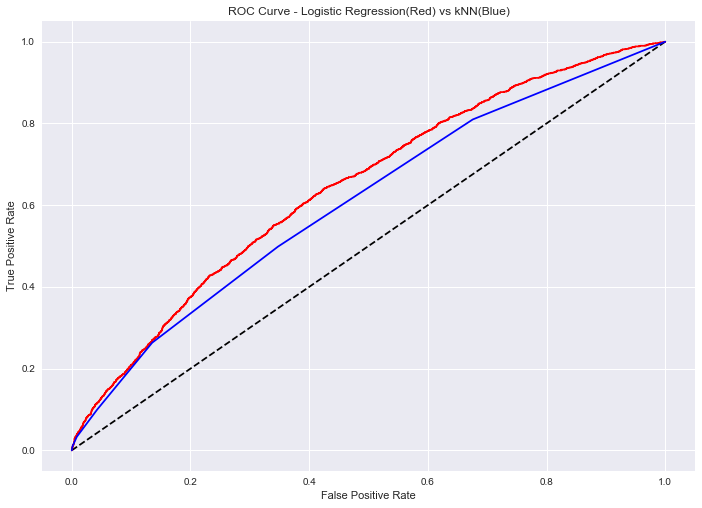

In [55]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_Test)[:,1]
fpr, tpr, thresholds = roc_curve(y_Test, y_pred_prob)

y_predicted_knn = knn_6NN.predict_proba(X_Test)[:,1]
fpr_kNN, tpr_kNN, thresholds_kNN = roc_curve(y_Test, y_predicted_knn)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,color='r')
plt.plot(fpr_kNN, tpr_kNN, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression(Red) vs kNN(Blue)')
plt.show()


### SVM


In [48]:
from sklearn import svm

svm_clsf=svm.SVC()

svm_clsf.fit (X_Train, y_Train)
accuracy_svm = svm_clsf.score(X_Test, y_Test)
print("The accuracy of SVM - without any modified parameters is: ", accuracy_svm)

The accuracy of SVM - without any modified parameters is:  0.7796666666666666


### Random Forest - implementation 1


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_Train,y_Train)

accuracy_rf = rf.score(X_Test,y_Test)
print("The accuracy of RF - without any modified parameters is: ", accuracy_rf)


The accuracy of RF - without any modified parameters is:  0.8128888888888889
